[Phi-3-vision-128k-instruct Huggingface](https://huggingface.co/microsoft/Phi-3-vision-128k-instruct)

In [ ]:
#@title Install and Auto restart
import os
root_path=os.getcwd()
# root_path="/content"
base_path=f"{root_path}"

requirements_content = """accelerate==0.30.1
flash_attn==2.5.8
numpy==1.24.4
Pillow==10.1.0
Requests==2.31.0
transformers==4.40.2
gradio==4.29.0
pydub==0.25.1
edge-tts
# gradio==4.15.0
# Pillow==10.3.0
# torch==2.3.0
# torchvision==0.18.0
"""
with open(f"{base_path}/requirements.txt", "w") as file:
    file.write(requirements_content)

print(f"File '{base_path}/requirements.txt' has been successfully created with the specified contents.")

from google.colab import output
# output.eval_js('new Audio("https://github.com/neuralfalcon/Roop-Image-FaceSwap/raw/main/start.mp3").play()')
!pip install -r $base_path/requirements.txt
from IPython.display import clear_output
clear_output()
# output.eval_js('new Audio("https://github.com/neuralfalcon/Roop-Image-FaceSwap/raw/main/install_voice.mp3").play()')
import time
time.sleep(6)
import os
os.kill(os.getpid(), 9)

# After runtime disconneted Run from here 👇

In [1]:
#@title <-- Play the audio { display-mode: "form" }

%%html
<b>Press play on the music player to keep the tab alive, then run the cell below</b><br/>
<audio src="https://raw.githubusercontent.com/KoboldAI/KoboldAI-Client/main/colab/silence.m4a" controls>

In [2]:
#@title Download /microsoft/Phi-3-vision-128k-instruct
from tqdm import tqdm
import urllib
import os
import shutil
def conditional_download(url, download_file_path):
    print(f"Downloading {os.path.basename(download_file_path)}")
    base_path = os.path.dirname(download_file_path)

    if not os.path.exists(base_path):
        os.makedirs(base_path)

    if os.path.exists(download_file_path):
        os.remove(download_file_path)

    try:
        request = urllib.request.urlopen(url)  # type: ignore[attr-defined]
        total = int(request.headers.get('Content-Length', 0))
    except urllib.error.URLError as e:
        print(f"Error: Unable to open the URL - {url}")
        print(f"Reason: {e.reason}")
        return

    with tqdm(total=total, desc='Downloading', unit='B', unit_scale=True, unit_divisor=1024) as progress:
        try:
            urllib.request.urlretrieve(url, download_file_path, reporthook=lambda count, block_size, total_size: progress.update(block_size))  # type: ignore[attr-defined]
        except urllib.error.URLError as e:
            print(f"Error: Failed to download the file from the URL - {url}")
            print(f"Reason: {e.reason}")
            return

    print(f"Download successful!")
    print(f"URL: {url}")
    print(f"Save at: {download_file_path}")


#set up base_path
import os
root_path=os.getcwd()
# root_path="/content"
base_path=f"{root_path}"



download_dir=f"{base_path}/microsoft/Phi-3-vision-128k-instruct"
if not os.path.exists(download_dir):
    os.makedirs(download_dir)
download_list = [
    "config.json",
    "configuration_phi3_v.py",
    "image_embedding_phi3_v.py",
    "image_processing_phi3_v.py",
    "model.safetensors.index.json",
    "modeling_phi3_v.py",
    "preprocessor_config.json",
    "processing_phi3_v.py",
    "sample_inference.py",
    "special_tokens_map.json",
    "tokenizer.json",
    "tokenizer_config.json",
    "model-00001-of-00002.safetensors",
    "model-00002-of-00002.safetensors"
]
base_url="https://huggingface.co/microsoft/Phi-3-vision-128k-instruct/resolve/main"
# fix_url="https://raw.githubusercontent.com/neuralfalcon/Phi-3-vision-128k-instruct-colab/main/"
for i in download_list:
  # if i=="config.json" or i=="modeling_phi3_v.py":
  #   file_url=f"{fix_url}/{i}"
  # else:
  #   file_url=f"{base_url}/{i}"
  file_url=f"{base_url}/{i}"
  download_file_path=f"{download_dir}/{i}"
  conditional_download(file_url, download_file_path)
from IPython.display import clear_output
clear_output()

In [3]:
#@title import /microsoft/Phi-3-vision-128k-instruct
import os
root_path=os.getcwd()
# root_path="/content"
base_path=f"{root_path}"
from PIL import Image
import requests
from transformers import AutoModelForCausalLM
from transformers import AutoProcessor
import os
model_id = f"{base_path}/microsoft/Phi-3-vision-128k-instruct"
model = AutoModelForCausalLM.from_pretrained(model_id, device_map="cuda", trust_remote_code=True, torch_dtype="auto", _attn_implementation="eager")
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [14]:
#@title Main code
temp_image=""
def ask_question(question="What is shown in this image?",user_image=""):
  global temp_image
  if os.path.exists(user_image):
    image = Image.open(user_image)
    temp_image=user_image
  elif os.path.exists(temp_image):
    image = Image.open(temp_image)
  else:
    return "Please upload a image"

  messages = [
      {"role": "user", "content": f"<|image_1|>\n{question}"},
      # {"role": "assistant", "content": "The chart displays the percentage of respondents who agree with various statements about their preparedness for meetings. It shows five categories: 'Having clear and pre-defined goals for meetings', 'Knowing where to find the information I need for a meeting', 'Understanding my exact role and responsibilities when I'm invited', 'Having tools to manage admin tasks like note-taking or summarization', and 'Having more focus time to sufficiently prepare for meetings'. Each category has an associated bar indicating the level of agreement, measured on a scale from 0% to 100%."},
      # {"role": "user", "content": "Provide insightful questions to spark discussion."}
  ]

  # url = "https://assets-c4akfrf5b4d3f4b7.z01.azurefd.net/assets/2024/04/BMDataViz_661fb89f3845e.png"
  # image = Image.open(requests.get(url, stream=True).raw)


  prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

  inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

  generation_args = {
      "max_new_tokens": 500,
      "temperature": 0.0,
      "do_sample": False,
  }

  generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

  # remove input tokens
  generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
  response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

  # print(response)
  return response.strip()


import matplotlib.pyplot as plt
from PIL import Image

def display_resized_image(image_path, max_size=(800, 800)):
    """
    Reads an image from the given path, resizes it to fit within the specified max size,
    and displays it using Matplotlib.

    Parameters:
    - image_path: str, path to the image file.
    - max_size: tuple, (width, height) maximum size for the resized image. Default is (800, 800).
    """
    # Load the image
    image = Image.open(image_path)

    # Resize the image to fit within the max_size, maintaining the aspect ratio
    image.thumbnail(max_size, Image.LANCZOS)

    # Display the image using Matplotlib
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')  # Hide the axes
    plt.show()


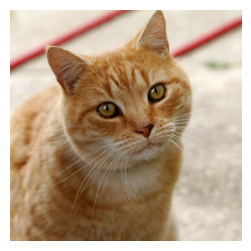

"The image shows a close-up of a cat with a blurred background. The cat has a golden-orange coat, white whiskers, and a pink nose. Its eyes are wide and alert, and it appears to be looking directly at the camera. The cat's ears are perked up, and its mouth is closed. There is a red object in the background, possibly a leash or a toy."

In [16]:
user_image = '/content/Cat.jpg'  # @param {type: "string"}
question = 'Describe the image'  # @param {type: "string"}

answer=ask_question(question,user_image)
display_resized_image(user_image)
answer

In [17]:
#@title Use as gradio chatbot
import gradio as gr
import time

def add_message(history, message):
    if "files" in message and message["files"]:
        for file in message["files"]:
            history.append(((file,), None))
    if "text" in message and message["text"] is not None:
        history.append((message["text"], None))
    return history, gr.update(value=None, interactive=True)

def bot(history):
    # response = "**That's cool!**"

    # Extract the last file path and last message
    last_file_path = None
    last_message = None
    for entry in reversed(history):
        if last_file_path is None and isinstance(entry[0], tuple):
            last_file_path = entry[0][0]
        if last_message is None and isinstance(entry[0], str):
            last_message = entry[0]
        if last_file_path and last_message:
            break

    if last_file_path:
        print("Last file path:", last_file_path)
        user_image=last_file_path
    else:
        user_image=""
    if last_message:
        print("Last message:", last_message)
        question=last_message
    else:
        question="What is shown in this image?"

    response=ask_question(question,user_image)
    history.append(("", ""))
    for character in response:
        history[-1] = (history[-1][0], history[-1][1] + character)
        time.sleep(0.05)
        yield history

with gr.Blocks() as demo:
    chatbot = gr.Chatbot(
        [],
        elem_id="chatbot",
        bubble_full_width=False
    )

    chat_input = gr.MultimodalTextbox(
        interactive=True, file_types=["image"], placeholder="Enter message or upload file...", show_label=False
    )

    chat_msg = chat_input.submit(add_message, [chatbot, chat_input], [chatbot, chat_input])
    bot_msg = chat_msg.then(bot, chatbot, chatbot, api_name="bot_response")
    bot_msg.then(lambda: gr.update(interactive=True), None, [chat_input])

demo.queue()
demo.launch(debug=False)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://dc0f685bab95b6785a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# This part for realtime talking with the model

In [18]:
#@title <-- Just run the cell (config edge TTS)
def calculate_rate_string(input_value):
    rate = (input_value - 1) * 100
    sign = '+' if input_value >= 1 else '-'
    return f"{sign}{abs(int(rate))}"


def make_chunks(input_text, language):
    language="English"
    if language == "English":
      temp_list = input_text.strip().split(".")
      filtered_list = [element.strip() + '.' for element in temp_list[:-1] if element.strip() and element.strip() != "'" and element.strip() != '"']
      if temp_list[-1].strip():
          filtered_list.append(temp_list[-1].strip())
      return filtered_list




import re
import uuid
def tts_file_name(text):
    if text.endswith("."):
        text = text[:-1]
    text = text.lower()
    text = text.strip()
    text = text.replace(" ","_")
    truncated_text = text[:25] if len(text) > 25 else text if len(text) > 0 else "empty"
    random_string = uuid.uuid4().hex[:8].upper()
    file_name = f"/content/edge_tts_voice/{truncated_text}_{random_string}.mp3"
    return file_name


from pydub import AudioSegment
import shutil
import os
def merge_audio_files(audio_paths, output_path):
    # Initialize an empty AudioSegment
    merged_audio = AudioSegment.silent(duration=0)

    # Iterate through each audio file path
    for audio_path in audio_paths:
        # Load the audio file using Pydub
        audio = AudioSegment.from_file(audio_path)

        # Append the current audio file to the merged_audio
        merged_audio += audio

    # Export the merged audio to the specified output path
    merged_audio.export(output_path, format="mp3")

def edge_free_tts(chunks_list,speed,voice_name,save_path):
  print(chunks_list)
  if len(chunks_list)>1:
    chunk_audio_list=[]
    if os.path.exists("/content/edge_tts_voice"):
      shutil.rmtree("/content/edge_tts_voice")
    os.mkdir("/content/edge_tts_voice")
    k=1
    for i in chunks_list:
      print(i)
      edge_command=f'edge-tts  --rate={calculate_rate_string(speed)}% --voice {voice_name} --text "{i}" --write-media /content/edge_tts_voice/{k}.mp3'
      print(edge_command)
      var1=os.system(edge_command)
      if var1==0:
        pass
      else:
        print(f"Failed: {i}")
      chunk_audio_list.append(f"/content/edge_tts_voice/{k}.mp3")
      k+=1
    print(chunk_audio_list)
    merge_audio_files(chunk_audio_list, save_path)
  else:
    edge_command=f'edge-tts  --rate={calculate_rate_string(speed)}% --voice {voice_name} --text "{chunks_list[0]}" --write-media {save_path}'
    print(edge_command)
    var2=os.system(edge_command)
    if var2==0:
      pass
    else:
      print(f"Failed: {chunks_list[0]}")
  return save_path


text = 'This is Phi-3-vision-128k-instruct Demo'  # @param {type: "string"}
Language = "English" # @param ['English']

Gender = "Female"# @param ['Male', 'Female']
female_voice="en-US-AriaNeural"# @param["en-US-AriaNeural",'zh-CN-XiaoxiaoNeural','zh-CN-XiaoyiNeural']
speed = 1  # @param {type: "number"}
translate_text_flag  = False
long_sentence = False # @param {type:"boolean"}
save_path = '/content/edge.wav'  # @param {type: "string"}
if len(save_path)==0:
  save_path=tts_file_name(text)
if Language == "English" :
  if Gender=="Male":
    voice_name="en-US-ChristopherNeural"
  if Gender=="Female":
    voice_name=female_voice
    # voice_name="en-US-AriaNeural"


if translate_text_flag:
  input_text=text
  # input_text=translate_text(text, Language)
  # print("Translateting")
else:
  input_text=text
if long_sentence==True and translate_text_flag==True:
  chunks_list=make_chunks(input_text,Language)
elif long_sentence==True and translate_text_flag==False:
  chunks_list=make_chunks(input_text,"English")
else:
  chunks_list=[input_text]
# print(chunks_list)
# edge_save_path=edge_free_tts(chunks_list,speed,voice_name,save_path)
# from IPython.display import clear_output
# clear_output()
# from IPython.display import Audio
# Audio(edge_save_path, autoplay=True)

from IPython.display import clear_output
from IPython.display import Audio
if not os.path.exists("/content/audio"):
    os.mkdir("/content/audio")
import uuid
def random_audio_name_generate():
  random_uuid = uuid.uuid4()
  audio_extension = ".mp3"
  random_audio_name = str(random_uuid)[:8] + audio_extension
  return random_audio_name
def talk(input_text):
  global long_sentence,translate_text_flag,Language,speed,voice_name
  if long_sentence==True and translate_text_flag==True:
    chunks_list=make_chunks(input_text,Language)
  elif long_sentence==True and translate_text_flag==False:
    chunks_list=make_chunks(input_text,"English")
  else:
    chunks_list=[input_text]
  save_path="/content/audio/"+random_audio_name_generate()
  edge_save_path=edge_free_tts(chunks_list,speed,voice_name,save_path)
  return edge_save_path


edge_save_path=talk(text)
Audio(edge_save_path, autoplay=True)

['This is Phi-3-vision-128k-instruct Demo']
edge-tts  --rate=+0% --voice en-US-AriaNeural --text "This is Phi-3-vision-128k-instruct Demo" --write-media /content/audio/233e7f46.mp3


In [19]:
#@title utils for graido

import uuid
def random_image_name():
  random_uuid = uuid.uuid4()
  image_extension = ".jpg"
  random_image_name = str(random_uuid)[:8] + image_extension
  return random_image_name
import shutil
import os
import uuid
from PIL import Image

if not os.path.exists("/content/upload"):
    os.mkdir("/content/upload")

def process_upload_image(prompt, gradio_image):
    print(gradio_image)
    print(type(gradio_image))
    try:
        # Handle PIL format image
        image = Image.open(gradio_image)
        # Generate a random image name using UUID
        image_name = random_image_name()
        # Save the image to the upload directory
        copy_image_path = os.path.join("/content/upload", image_name)
        print(f"Upload Image Saved at {copy_image_path}")
        image.save(copy_image_path)
        answer=ask_question(prompt,copy_image_path)
        edge_save_path=talk(answer)
        return edge_save_path
    except Exception as e:
        print(f"Error: {e}")
        copy_image_path=f"/content/upload/{random_image_name()}"
        gradio_image.save(copy_image_path)
        print(f"Upload Image Saved at {copy_image_path}")
        answer=ask_question(prompt,copy_image_path)
        edge_save_path=talk(answer)
        return edge_save_path

# # Example usage:
# gradio_image_path = "/content/monalisa.jpg"  # Replace with the actual path to your image
# prompt = "What's going on? Respond with a single sentence."
# process_upload_image(prompt, gradio_image_path)
# gradio_image_path = Image.open("/content/monalisa.jpg")
# process_upload_image(prompt, gradio_image_path)

In [20]:
#@title Run Gradio app and copy the url [For realtime]

import gradio as gr
image_inputs=[gr.Textbox(label="Write Prompt",value="What's going on? Respond with a single sentence."),gr.Image(type='pil',label="Upload a Image")]
# image_outputs=[gr.Textbox(label="Result")]
image_outputs=[gr.File(label="Result")]

app_demo = gr.Interface(fn=process_upload_image, inputs=image_inputs,outputs=image_outputs , title="MoonDream")
app_demo.launch(share=True,debug=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://348c7c8264c36c9e39.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
